In [1]:
import argparse
import h5py
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import xml.etree.ElementTree as etree
from fastmri_prostate.reconstruction.t2.prostate_t2_recon import t2_reconstruction
from fastmri_prostate.reconstruction.dwi.prostate_dwi_recon import dwi_reconstruction
from fastmri_prostate.data.mri_data import load_file_T2, load_file_dwi, save_recon
import warnings
import os
warnings.filterwarnings('ignore')

Visualize PDW knees with and without Fat Supression

In [9]:
#! Below: Add full folder path to downloaded fastMRI prostate data
fastMRI_dir = "/DATASERVER/MIC/SHARED/NYU_FastMRI/Prostate/"

data_path_t2 = 'fastMRI_prostate_T2_IDS_001_020'
data_path_dwi = 'fastMRI_prostate_DIFF_IDS_001_011'

fname_t2 = os.path.join(fastMRI_dir, data_path_t2, 'file_prostate_AXT2_001.h5')
fname_dwi = os.path.join(fastMRI_dir,data_path_dwi, 'file_prostate_AXDIFF_001.h5')

hf_t2 = h5py.File(fname_t2, 'r')
hf_dwi = h5py.File(fname_dwi, 'r')

In [13]:
reconstruction_rss_t2 = hf_t2['reconstruction_rss'][()] 
print("reconstruction_rss_t2:", reconstruction_rss_t2.shape) # (30, 320, 320)


# get the apparent diffusion coeff map with dimension (slices,x,y)
adc_map = hf_dwi['adc_map'][()]  
print("adc_map:", adc_map.shape) # (30, 100, 100)

reconstruction_rss_t2: (30, 320, 320)
adc_map: (30, 100, 100)


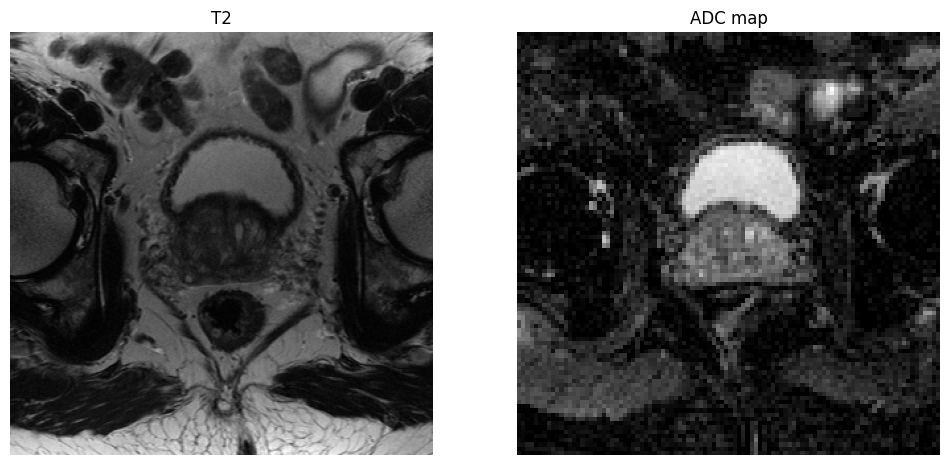

In [19]:
# Visualize the data
slice = 10

# plot PDW knee and PDFS knee side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# plot T2W prostate
axs[0].imshow(reconstruction_rss_t2[slice], cmap='gray')
axs[0].set_title('T2')
axs[0].axis('off')

# plot ADC map prostate
axs[1].imshow(adc_map[slice], cmap='gray')
axs[1].set_title('ADC map')
axs[1].axis('off')

plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/T2_ADC_prostate.png') #make sure this is BEFORE plt.show()
plt.show()
